# I ANALYSED MY SPOTIFY DATA
---

![](https://developer.spotify.com/assets/branding-guidelines/logo@2x.png)

### **COVID-19 CHANGED MY MUSIC TASTE**

After six months in lockdown and being one the privileged ones to experiment with new habits and lifestyles during the quarantine, I look back at my streaming history to identify the changes in my music tastes during the lockdown. During the process I identified the following:
* I listened to **964** artists during a period of 12 months, out of which I discovered **313** of them only after the lockdown.
* My top artists and tracks changed during the lockdown.
* During the lockdown, I streamed **BTS**'s music the most.

I further extended my analysis to dive deeper into BTS in an attempt to know what it was that changed my preferences drastically. During the process I identified that BTS's music has **high 'danceability' and energy**, which acted as a escape from the monotony of quarantine.

Lastly, I extracted some data of other [top K-Pop artists](https://www.koreaboo.com/lists/top-25-followed-kpop-artists-spotify/) to find similar tracks based on my preference of audio features.

In [58]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import matplotlib.style as style
style.use('seaborn-poster')
sns.set_style('darkgrid')

In [59]:
#Getting the data
mydata = pd.read_csv('../input/mydata/spotify_data.csv', index_col=0,parse_dates=['Date'])
btsdata = pd.read_csv('../input/mydata/bts.csv', index_col='index')

In [60]:
mydata['trackName']= mydata['trackName'].map(lambda x: x.lower())
mydata['minPlayed']= mydata['msPlayed'].map(lambda x: x/60000)
mydata['hrsPlayed']= mydata['msPlayed'].map(lambda x: x/3600000)

In [61]:
mydata.head()

,Date,artistName,trackName,msPlayed,minPlayed,hrsPlayed
0,2019-09-03,The Weeknd,call out my name,89476,1.491267,0.024854
1,2019-09-08,The Weeknd,call out my name,138897,2.314950,0.038582
2,2019-09-08,Cartoon,on & on,207068,3.451133,0.057519
3,2019-09-08,Liam Payne,for you (fifty shades freed) (& rita ora),245453,4.090883,0.068181
4,2019-09-08,Daft Punk,instant crush (feat. julian casablancas),286040,4.767333,0.079456


In [62]:
btsdata.head()

,danceability,energy,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artist_name,release_date,song_name
index,,,,,,,,,,,,,,
1,0.560,0.358,2,0.775,0.9170,0.000000,0.924,0.766,101.387,131907,4,BTS,12-06-2013,Skit : Circle Room Talk
2,0.899,0.821,3,0.237,0.1940,0.524000,0.163,0.581,94.895,64133,4,BTS,12-06-2013,Intro : 2 COOL 4 SKOOL
3,0.755,0.956,8,0.150,0.0104,0.000011,0.144,0.883,144.091,223907,4,BTS,12-06-2013,"We Are Bulletproof, Pt. 2"
4,0.435,0.859,2,0.468,0.0131,0.000006,0.435,0.641,167.873,222053,4,BTS,12-06-2013,No More Dream
5,0.000,0.260,1,0.000,0.5250,0.868000,0.387,0.000,0.000,52453,0,BTS,12-06-2013,Interlude


In [63]:
#Dropping unnecessary columns
btsdata.drop(columns={'time_signature','key','artist_name'}, inplace=True)

In [64]:
btsdata['song_name']= btsdata['song_name'].map(lambda x: x.lower())
btsdata['duration_min']= btsdata['duration_ms'].map(lambda x: x/60000)

In [65]:
btsdata.head()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release_date,song_name,duration_min
index,,,,,,,,,,,,
1,0.560,0.358,0.775,0.9170,0.000000,0.924,0.766,101.387,131907,12-06-2013,skit : circle room talk,2.198450
2,0.899,0.821,0.237,0.1940,0.524000,0.163,0.581,94.895,64133,12-06-2013,intro : 2 cool 4 skool,1.068883
3,0.755,0.956,0.150,0.0104,0.000011,0.144,0.883,144.091,223907,12-06-2013,"we are bulletproof, pt. 2",3.731783
4,0.435,0.859,0.468,0.0131,0.000006,0.435,0.641,167.873,222053,12-06-2013,no more dream,3.700883
5,0.000,0.260,0.000,0.5250,0.868000,0.387,0.000,0.000,52453,12-06-2013,interlude,0.874217


In [66]:
#Number or artists discovered during Sept 2019-Sept 2020
len(mydata.artistName.unique())

964

In [67]:
#Number or artists discovered during March 2020-Sept 2020
pre_artist = mydata[mydata.Date < '2020-03-01'].artistName.unique()
len(mydata[mydata.Date > '2020-03-01'][~mydata.artistName.isin(pre_artist)].artistName.unique())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


313

VISUALIZING MY SPOTIFY DATA
---
---

In [68]:
def plotMean(data, mycolor, mylinestyle):
    plt.axvline(np.mean(data), color=mycolor, linestyle=mylinestyle, linewidth=1.5, label='Mean({})'.format(round(np.mean(data),2)))
    plt.legend(loc='best')
def plotMedian(data, mycolor, mylinestyle):
    plt.axvline(np.median(data), color=mycolor, linestyle=mylinestyle, linewidth=1.5, label='Median({})'.format(round(np.median(data),2)))
    plt.legend(loc='best')
def plotLabel(data,x):
    plt.annotate("Count: {}".format(round(data.max(),2)), (x, data.max()),bbox=dict(fc='yellow'))
def plotBar(data,palette):
    sns.barplot(x=data,y=data.keys(),palette = palette)
    plotMean(data,'r','-')
    plotMedian(data,'g','--')
    plt.show()

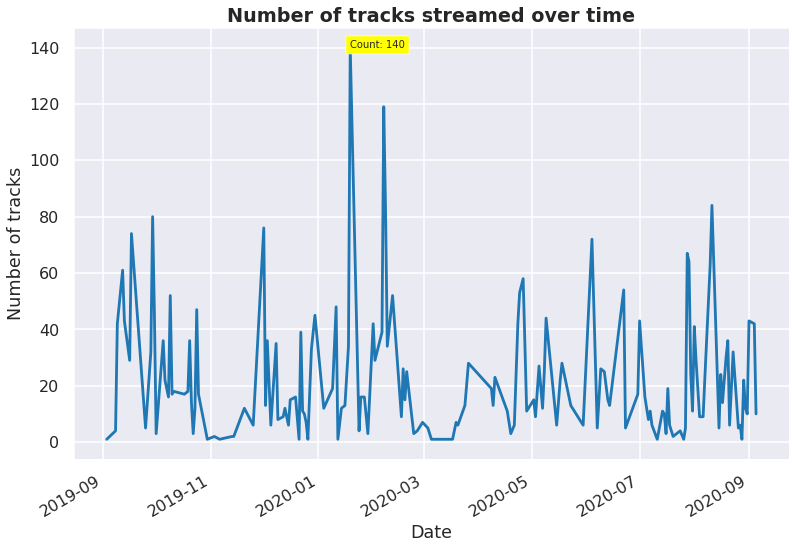

In [69]:
data = mydata.groupby(['Date','trackName'], as_index = False).size().groupby('Date').size()
data.plot.line()
plotLabel(data,'2020-01-19')
plt.title('Number of tracks streamed over time', fontweight='bold')
plt.ylabel('Number of tracks')
plt.show()

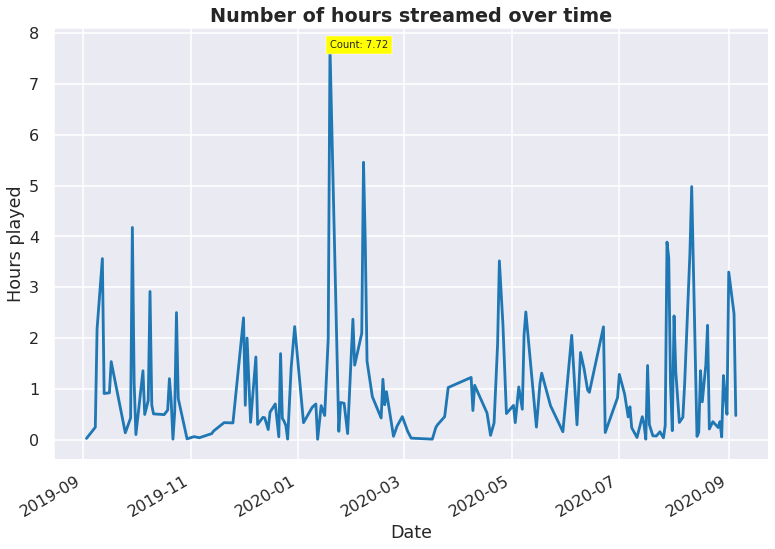

In [70]:
data = mydata.groupby(['Date','hrsPlayed'])['hrsPlayed'].sum().groupby('Date').sum()
data.plot.line()
plotLabel(data,'2020-01-19')
plt.title('Number of hours streamed over time', fontweight='bold')
plt.ylabel('Hours played')
plt.show()

## TOP TRACKS PRE-LOCKDOWN

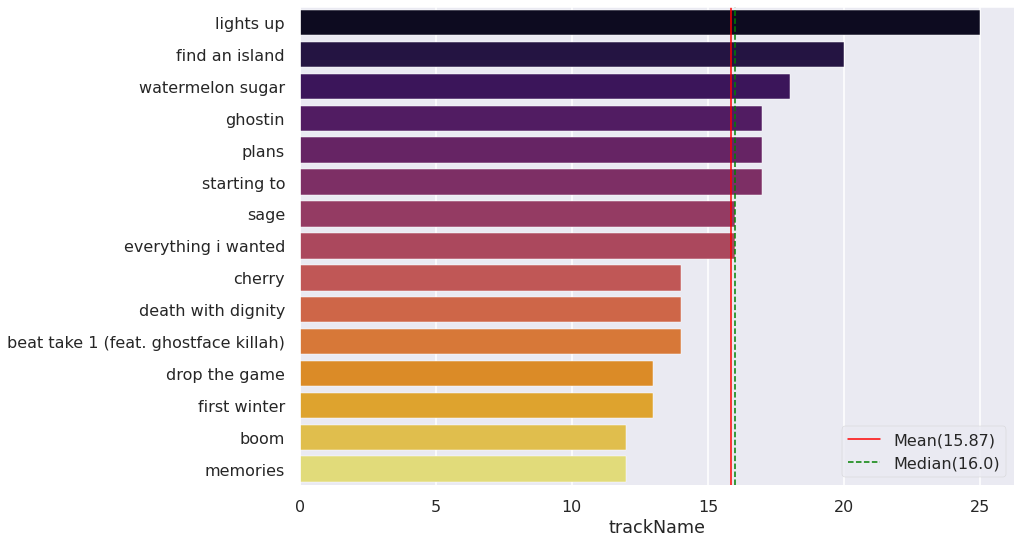

In [71]:
plotBar(mydata[mydata.Date < '2020-03-01'].trackName.value_counts()[:15],'inferno')

## TOP TRACKS POST-LOCKDOWN

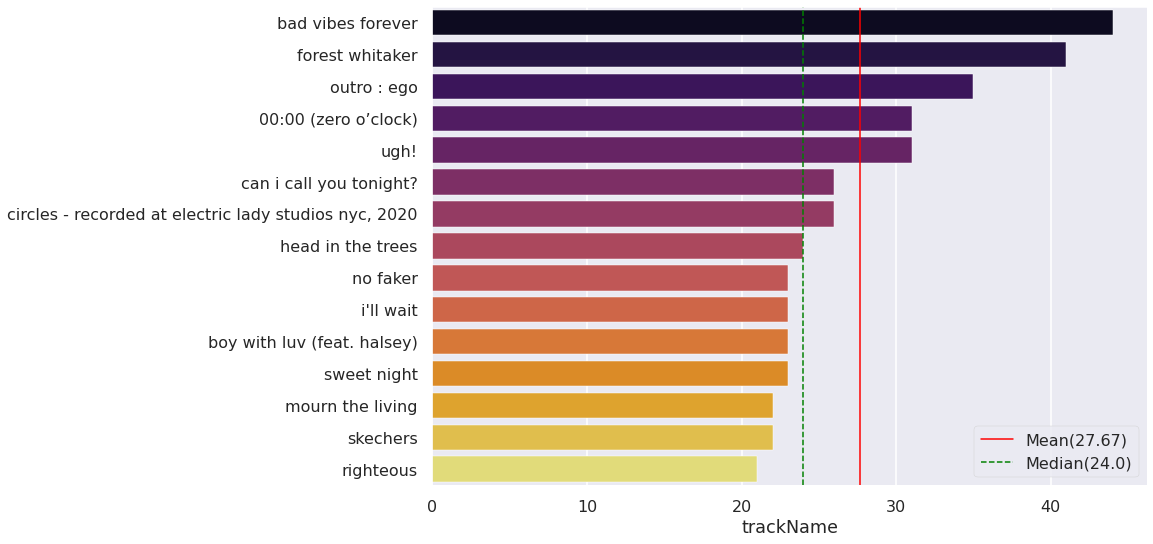

In [72]:
plotBar(mydata[mydata.Date > '2020-03-01'].trackName.value_counts()[:15], 'inferno')

## TOP STREAMED ARTISTS (SEPT'19-SEPT'20)

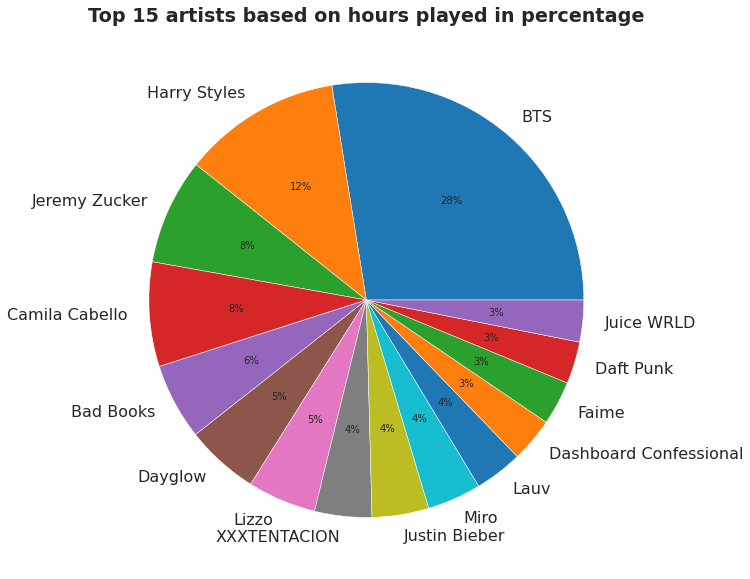

In [73]:
mydata.groupby(['artistName'])['hrsPlayed'].sum().sort_values(ascending=False)[:15].plot.pie(figsize=(10,10), autopct='%1.0f%%')
plt.title('Top 15 artists based on hours played in percentage', fontweight='bold')
plt.ylabel('')
plt.show()

## ANALYSING STREAMING ACTIVITY OF BTS'S MUSIC
Streaming history shows high activity after July 2020.

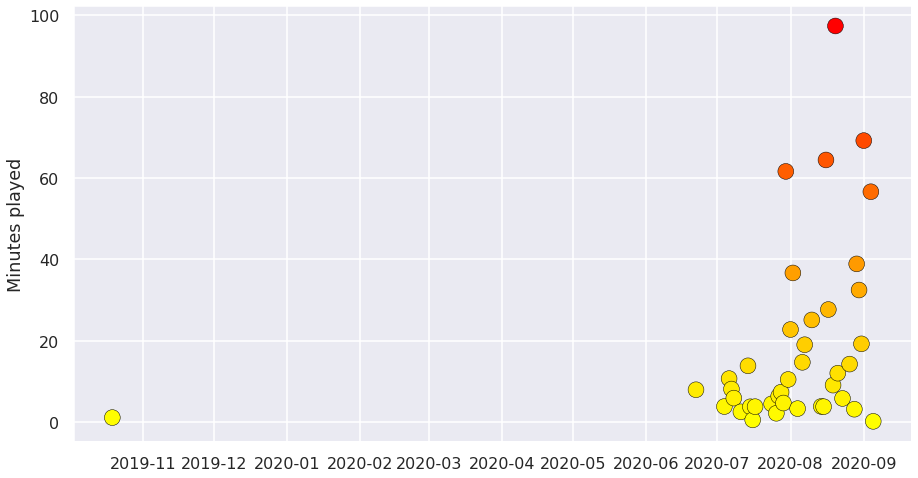

In [74]:
plt.figure(figsize=(15,8))
data = mydata[mydata.artistName.isin(['BTS','V','RM','BTSYOUNG4EVER'])].groupby(['Date','minPlayed'])['minPlayed'].sum().groupby('Date').sum()
plt.scatter(x=data.keys(), y=data,c=data, cmap='autumn_r',s= 250, edgecolors='black')
plt.ylabel('Minutes played')
plt.show()

## TOP ARTISTS BEFORE JULY-2020

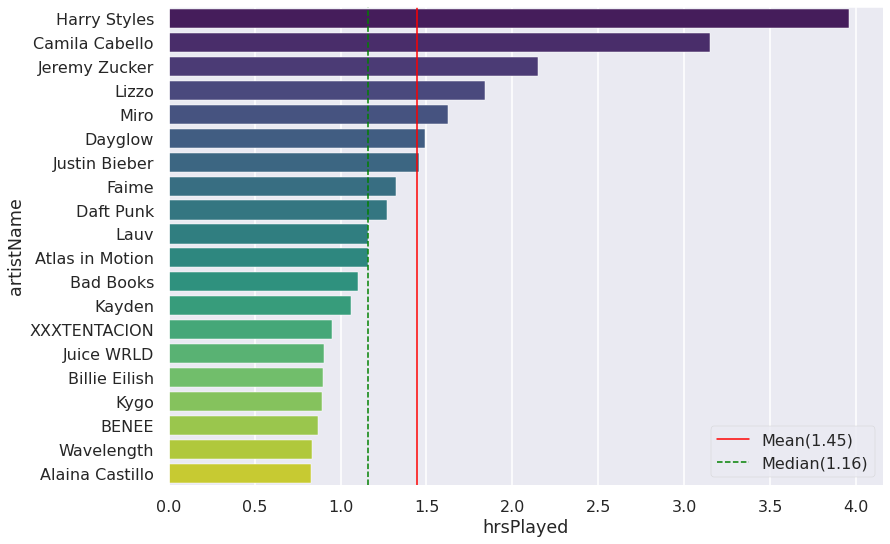

In [75]:
plotBar(mydata[mydata.Date < '2020-07-01'].groupby(['artistName'])['hrsPlayed'].sum().sort_values(ascending=False)[:20],'viridis')

## TOP ARTISTS AFTER JULY-2020

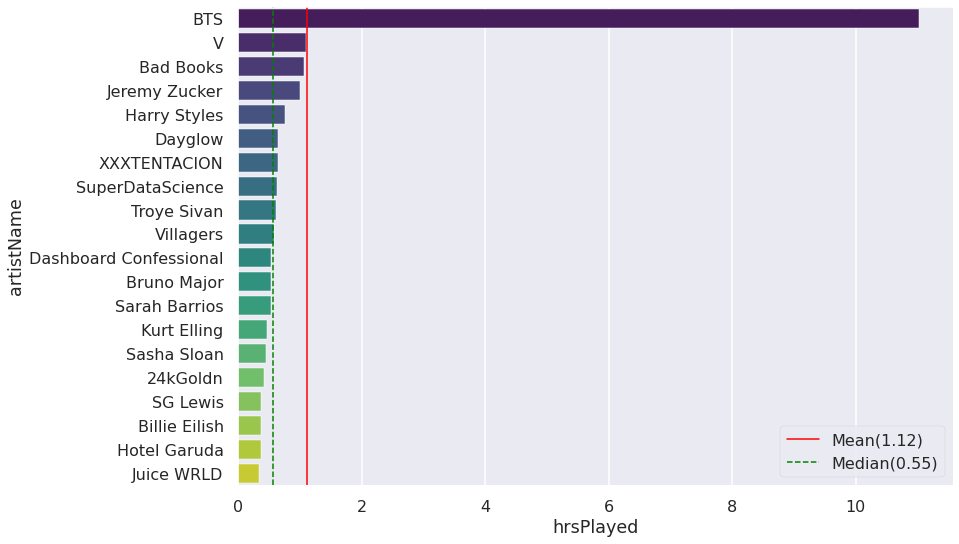

In [76]:
plotBar(mydata[mydata.Date > '2020-07-01'].groupby(['artistName'])['hrsPlayed'].sum().sort_values(ascending=False)[:20],'viridis')

## TOP BTS TRACKS

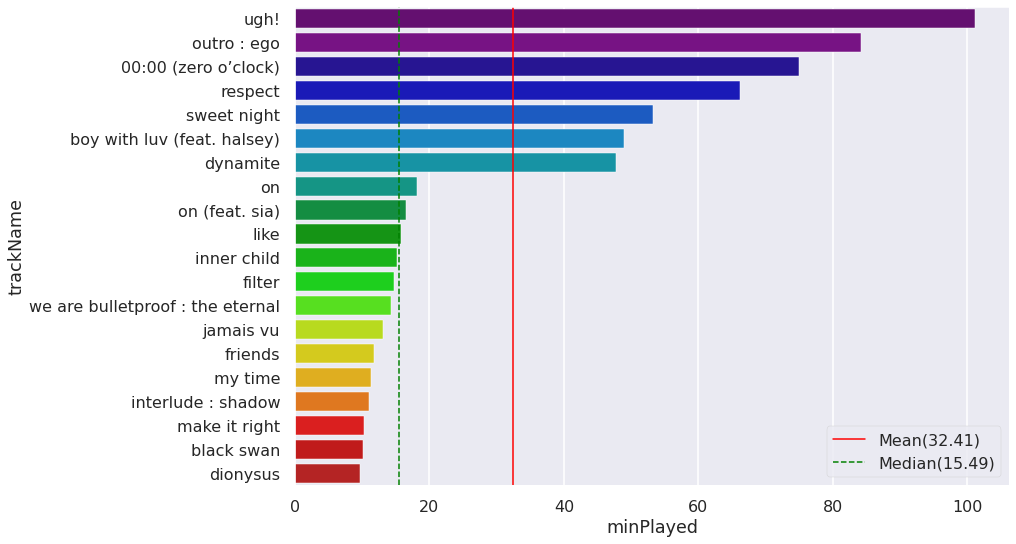

In [77]:
plotBar(mydata[mydata.artistName.isin(['BTS','V','RM','BTSYOUNG4EVER'])].groupby(['trackName'])['minPlayed'].sum().sort_values(ascending=False)[:20],'nipy_spectral')

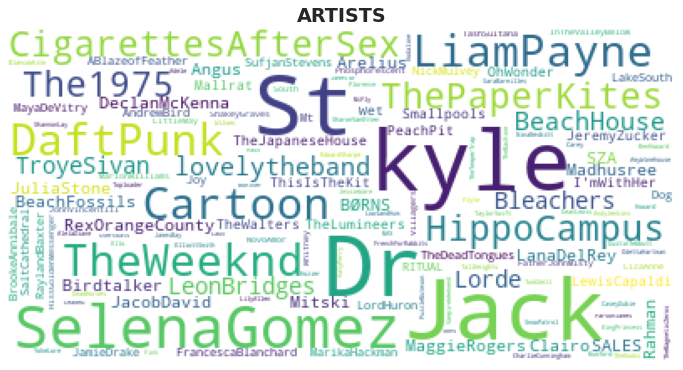

In [78]:
from wordcloud import WordCloud 
cloud=''
for x in mydata['artistName'].unique():
    x= x.replace(" ", "")
    cloud+= ''.join(x) +' '
plt.figure(figsize=(12,8))
wordcloud = WordCloud(background_color='white',max_font_size=50).generate(cloud)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('ARTISTS', fontweight='bold')
plt.show()

UNDERSTANDING BTS's MUSIC:
---
---

![](https://ibighit.com/bts/images/bts/profile/profile-kv.png)

The audio features and their values are provided by Spotify.
They are explained in the [Spotify for Developers](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/) documentation.

In [79]:
#My preferred values of audio features
preference = pd.DataFrame()

In [80]:
def plotFeatures(feature):
    data = btsdata[btsdata.song_name.isin(mydata[mydata.msPlayed>1].trackName.tolist())].groupby(['song_name'])[feature].mean().sort_values(ascending=False)
    sns.barplot(x=data,y=data.keys(),palette = 'gnuplot')
    plotMean(data,'r','--') 
    preference['{}'.format(feature)]= [round(np.mean(data),2)]
    plt.show()

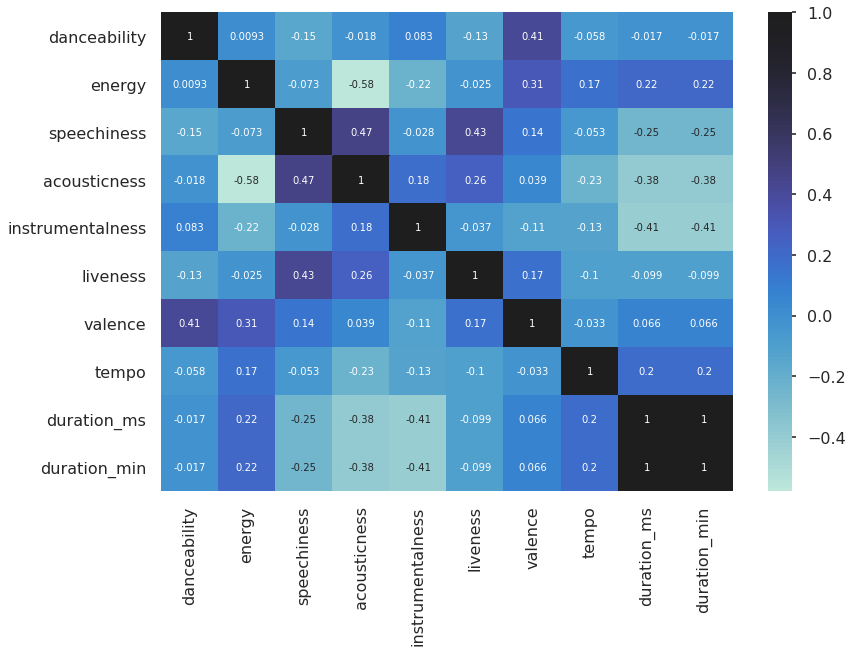

In [81]:
sns.heatmap(btsdata.corr(), annot=True, center=1)
plt.show()

HIGH POSITIVE CORRELATION:
 1. Acousticness - Speechiness
 2. Liveness - Speechiness
 
HIGH NEGATIVE CORRELATION:
 1. Acousticness - Energy
 (Visualizing this: )

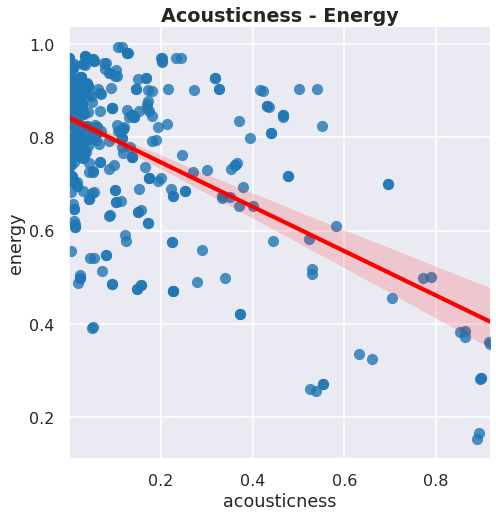

In [82]:
sns.lmplot(x='acousticness',y='energy',data=btsdata, height=7,line_kws={'color': 'red'})
plt.title('Acousticness - Energy', fontweight='bold')
plt.show()

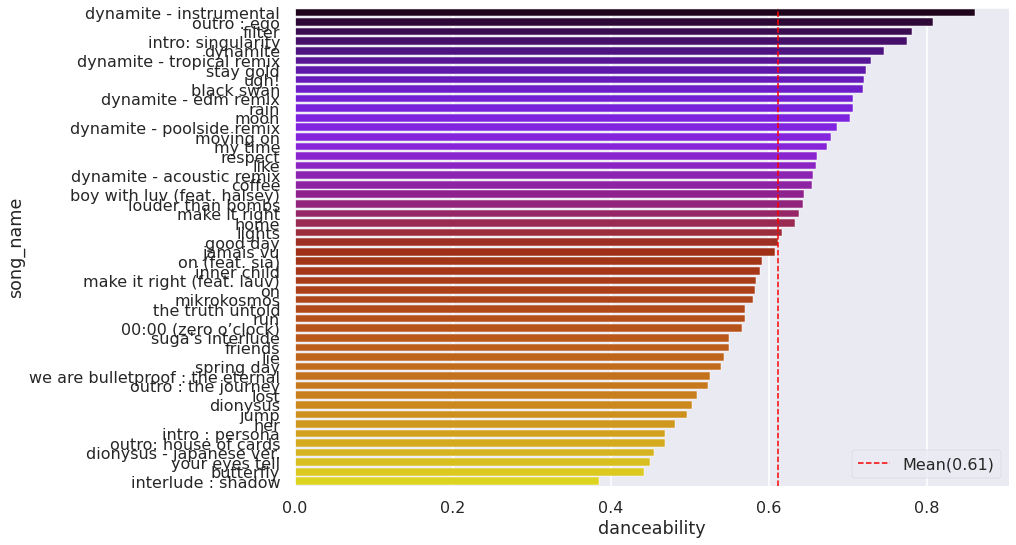

In [83]:
plotFeatures('danceability')

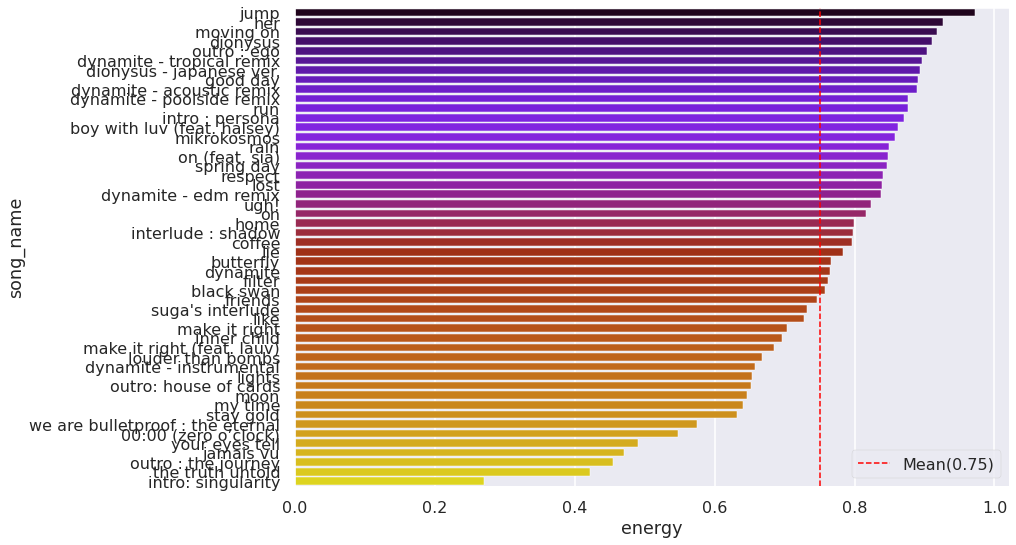

In [84]:
plotFeatures('energy')

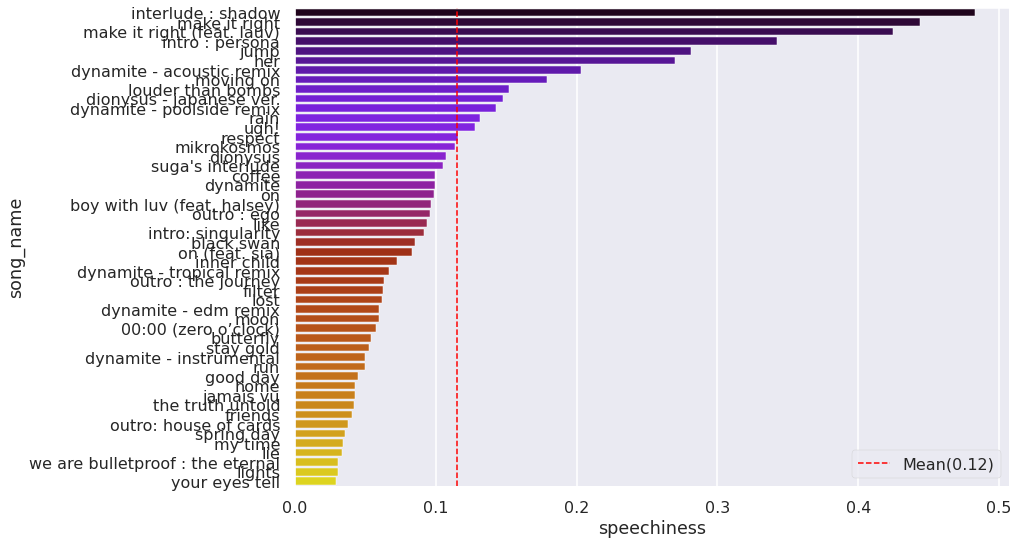

In [85]:
plotFeatures('speechiness')

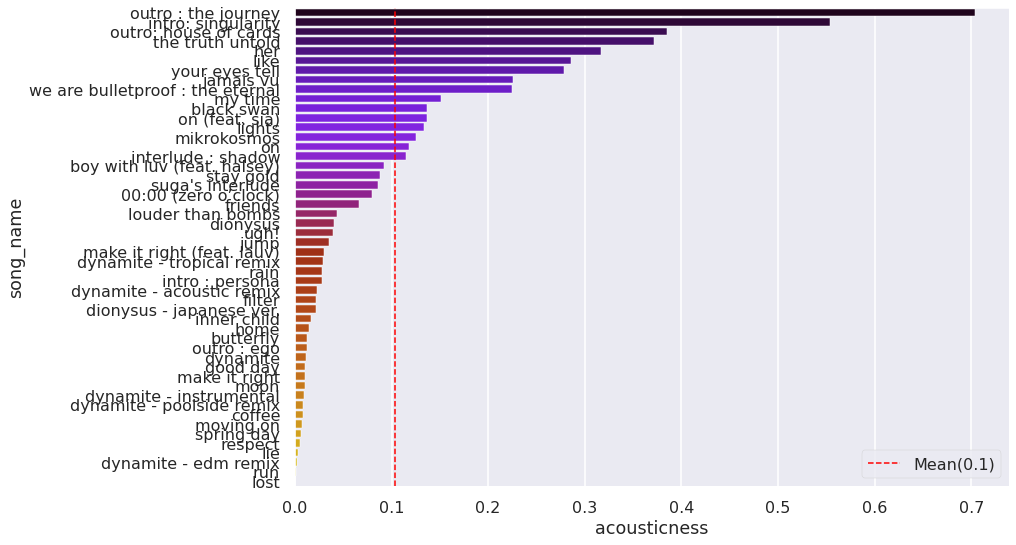

In [86]:
plotFeatures('acousticness')

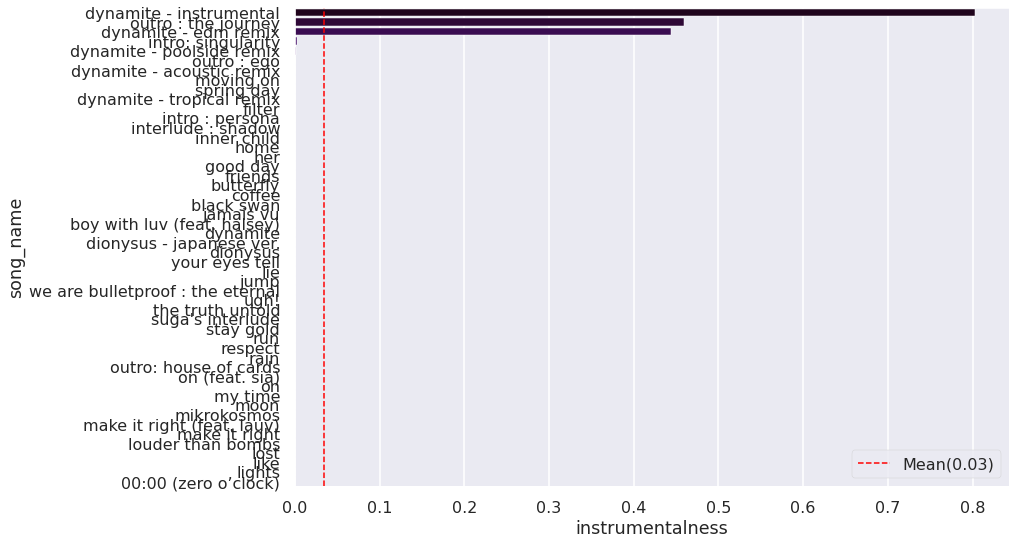

In [87]:
plotFeatures('instrumentalness')

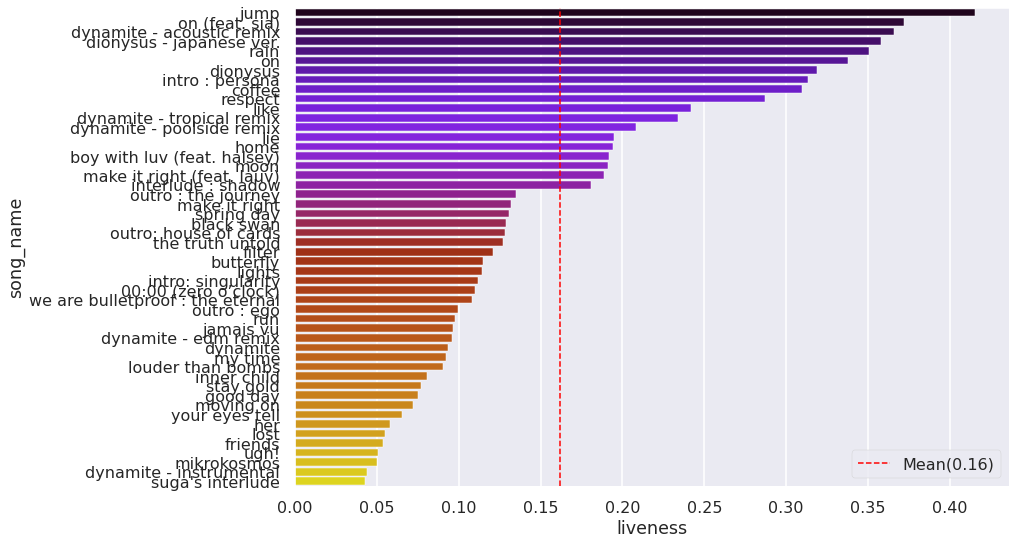

In [88]:
plotFeatures('liveness')

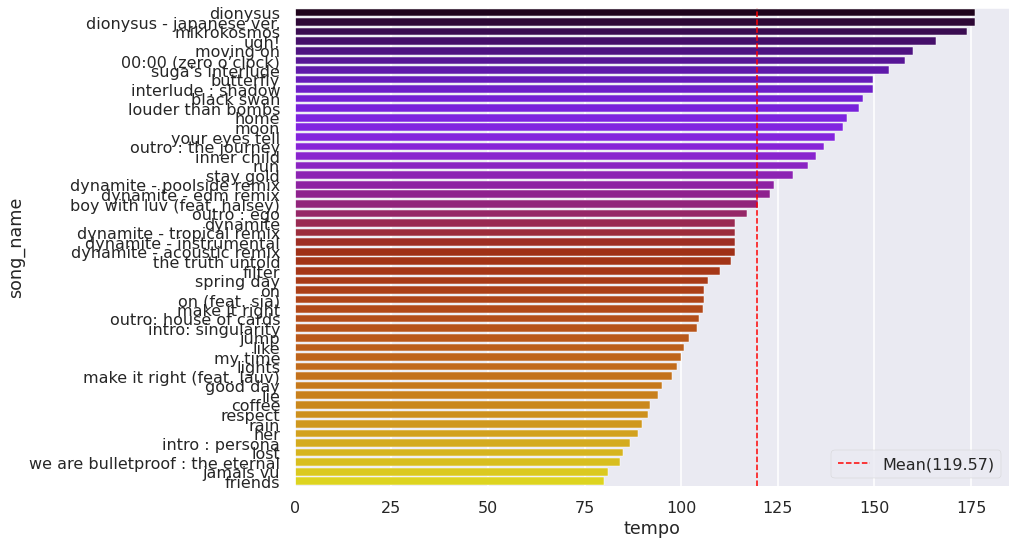

In [89]:
plotFeatures('tempo')

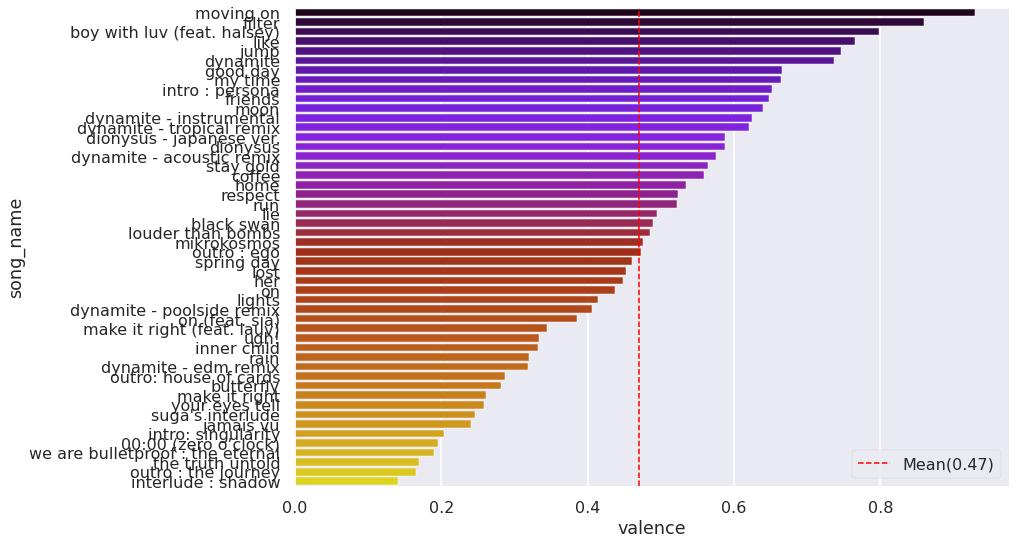

In [90]:
plotFeatures('valence')

In [91]:
preference

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,tempo,valence
0,0.61,0.75,0.12,0.1,0.03,0.16,119.57,0.47


**PREFERENCES:**
 1. High danceability
 2. High energy
 3. Low speechiness
 4. Low acousticness
 5. Low instrumentalness
 6. Low liveness
 7. High Tempo
 8. High Valence

# FINDING K-POP SONGS BASED ON MY PREFERENCES
---
inspo: https://www.kaggle.com/ahmadal/spotify-extensive-analysis-song-recommender

In [92]:
kpop = pd.read_csv('../input/mydata/kpop.csv', index_col=0)
kpop['song_name']= kpop['song_name'].map(lambda x: x.strip().lower())
kpop.head()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,artist_name,song_name
0,0.492,0.945,0.1630,0.02800,0.000000,0.954,0.190,135.021,212827,G-DRAGON,heartbreaker - g-dragon 2017 world tour <act i...
1,0.623,0.793,0.0431,0.00134,0.000007,0.495,0.193,128.023,209520,G-DRAGON,"breathe - g-dragon 2017 world tour <act iii, m..."
2,0.679,0.960,0.0712,0.20500,0.000000,0.957,0.647,114.954,211693,G-DRAGON,"a boy - g-dragon 2017 world tour <act iii, m.o..."
3,0.577,0.765,0.1370,0.43300,0.000000,0.572,0.283,109.885,247280,G-DRAGON,but i love u - g-dragon 2017 world tour <act i...
4,0.508,0.922,0.0767,0.02860,0.000000,0.309,0.449,128.294,320987,G-DRAGON,"obsession - g-dragon 2017 world tour <act iii,..."


In [93]:
#Features
kpop_features = kpop.loc[:,['acousticness','danceability','energy','instrumentalness','liveness','speechiness','tempo', 'valence']]
kpop_features.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,0.02800,0.492,0.945,0.000000,0.954,0.1630,135.021,0.190
1,0.00134,0.623,0.793,0.000007,0.495,0.0431,128.023,0.193
2,0.20500,0.679,0.960,0.000000,0.957,0.0712,114.954,0.647
3,0.43300,0.577,0.765,0.000000,0.572,0.1370,109.885,0.283
4,0.02860,0.508,0.922,0.000000,0.309,0.0767,128.294,0.449


## EUCLIDEAN DISTANCE TO FIND TRACKS WITH SIMILAR VALUES OF FEATURES

> The basis of many measures of similarity and dissimilarity is euclidean distance. The distance between vectors X and Y is defined as follows:
![image](http://www.analytictech.com/mb876/handouts/image001.gif)
In other words, euclidean distance is the square root of the sum of squared differences between corresponding elements of the two vectors. Note that the formula treats the values of X and Y seriously: no adjustment is made for differences in scale.
Euclidean distance is only appropriate for data measured on the same scale.
In order to compute similarities or dissimilarities among rows, we do not need to (in fact, must not) try to adjust for differences in scale. Hence, Euclidean distance is usually the right measure for comparing cases.
-[ source](http://www.analytictech.com/mb876/handouts/distance_and_correlation.htm#:~:text=The%20basis%20of%20many%20measures,elements%20of%20the%20two%20vectors.)

In [97]:
from sklearn.metrics.pairwise import euclidean_distances
kpop['Similarity'] = euclidean_distances(kpop_features, preference.to_numpy()).squeeze()

In [98]:
kpop.sort_values(by= 'Similarity', inplace= True)
similar = kpop[['artist_name', 'song_name', 'Similarity']]
similar = similar.drop_duplicates(subset=['artist_name', 'song_name'])

# **SIMILAR K-POP TRACKS**

In [99]:
similar.head(20)

,artist_name,song_name,Similarity
2476,Red Velvet,sappy,0.435920
2290,NCT 127,cherry bomb,0.460890
3339,BIGBANG,wake me up - bigbang japan dome tour 2017 -las...,0.474675
2979,GOT7,a (toyo remix),0.556172
2475,Red Velvet,sayonara,0.556456
677,G-DRAGON,i know - with may j.,0.560351
3890,BIGBANG,let's not fall in love - kr ver.,0.560351
3954,TWICE,what you waiting for,0.609600
4083,TWICE,missing u,0.626759
3824,BIGBANG,feeling,0.680307
